# NetCDF Tutorial

NetCDF is a self documenting data and file format for scientific databases.  NetCDF is a 
   1) Data model
   2) File format
   3) Application programming interface (API)
   4) Library implementing the API

Together the data model, file format, and APIs support the creation, access, and sharing of scientific data.

A netCDF file contains metadata describing groups, dimensions, and variables.  Lots of useful information can be found at http://www.unidata.ucar.edu/software/netcdf/workshops/2010/index.html

Material from this tutorial also Material from this tutorial liberally borrows from http://unidata.github.io/netcdf4-python.

## Groups

Groups provide a scope for names and a scalable way to organize data objects. Groups are like directories in a file system except that netCDF groups are all contained within a file.  Groups allow netCDF variables, dimensions, and attributes to be organized in hierarchical groups descending from the root group.

## Dimensions

A dimension may be used to represent a real physical dimension, for example, time, latitude, longitude, or height. A dimension might also be used to index other quantities, for example station or model-run-number.


## Attributes

NetCDF attributes are used to store data about the data (ancillary data or metadata), similar in many ways to the information stored in data dictionaries and schema in conventional database systems. Most attributes provide information about a specific variable. These are identified by the name (or ID) of that variable, together with the name of the attribute.

## Download and install

Go to http://unidata.github.io/netcdf4-python to download the latest version of the Python module for netCDF4.  This software allows you to read and write netCDF and HDF files using Python wrappers to the underlying C netCDF libraries.  Note, this means that the C netCDF and HDF5 libraries must be installed first.

## Example Python code

### 1) Creating/Opening/Closing a netCDF file



In [ ]:
from netCDF4 import Dataset

## open an existing file (returns the root group)
#
rootgrp = Dataset('surfdata_1x1pt_vielsalm_c080626.nc', 'r')

## examples of how to query the Dataset object
#
# dir(rootgrp)
# help(rootgrp.createDimension)

## close the file
#
rootgrp.close()

### 2) Dimensions in a netCDF file

Let's look at the dimensions in a group via the group's dimensions variable.  Note that the type of the dimensions object is a Python dictionary.  This means you can get a value within the dimension object using a key (the name of the dimension).


In [ ]:
rootgrp = Dataset('surfdata_1x1pt_vielsalm_c080626.nc', 'r')

## look at the dimensions
#
rootgrp.dimensions
lat  = rootgrp.dimensions['lsmlat']
time = rootgrp.dimensions['time']

## a dimension has a name
#
print(time.name)

## a dimension has a size
#
print(len(time))

## a dimension's size can be unlimited
#
print(time.isunlimited())


### 3) Variables in a netCDF file

NetCDF variables behave much like python multidimensional array objects in the numpy module.  Printing all of the variables in rootgrp would display too much information.  So let's just examine the variable 'PCT_GLACIER'.


In [ ]:
## look at a variable
#
glacier = rootgrp.variables['PCT_GLACIER']
print(glacier)

## look at various information regarding the variable
#     : don't forget to try dir(glacier)
#
print(glacier.name)
print(glacier.dimensions)
print(glacier.shape)


### 4) Attributes in a netCDF file

There are two types of attributes in a netCDF file, global and variable. Global attributes provide information about a group, or the entire dataset, as a whole. Variable attributes provide information about one of the variables in a group.


In [ ]:
## look at the attribute names in the root group
#
rootgrp.ncattrs()

## the attributes themselves are actually in the __dict__ variable of the group object
#
attrs = rootgrp.__dict__
#print(attrs['Glacier_raw_data_file_name']
attrs['Glacier_raw_data_file_name']


### 5) Retrieving data from a netCDF variable

Data in a netCDF variable is stored in a numpy.ndarray.


In [ ]:
## get the 'SOILCARB' variable
#
soil = rootgrp.variables['SOILCARB']
print(soil.dimensions)
print(soil.shape)

## print the first few values
#
print(soil[:3])


(10, 1, 1)


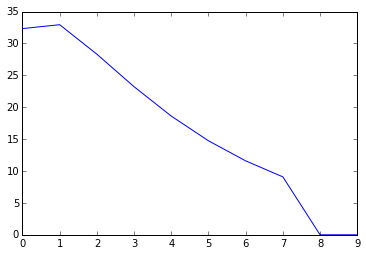

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data = soil[:]
print(np.shape(data))
plt.plot(data[:,0,0])
plt.show()